✅ Loaded: 500,000 rows | 46 columns


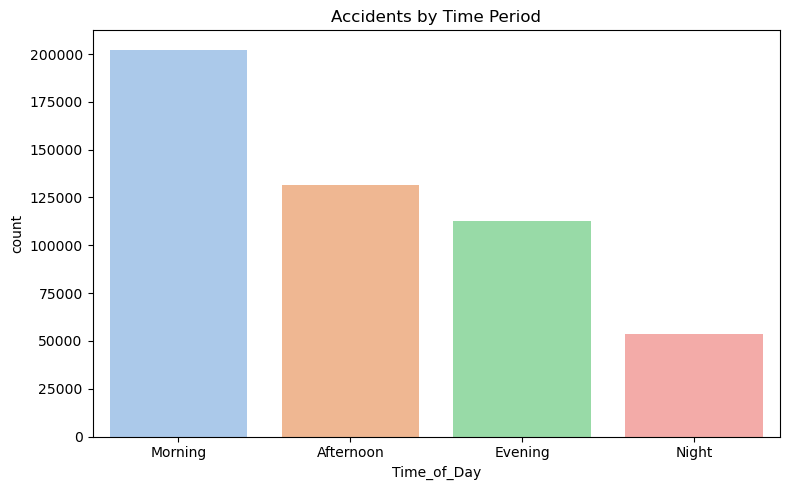

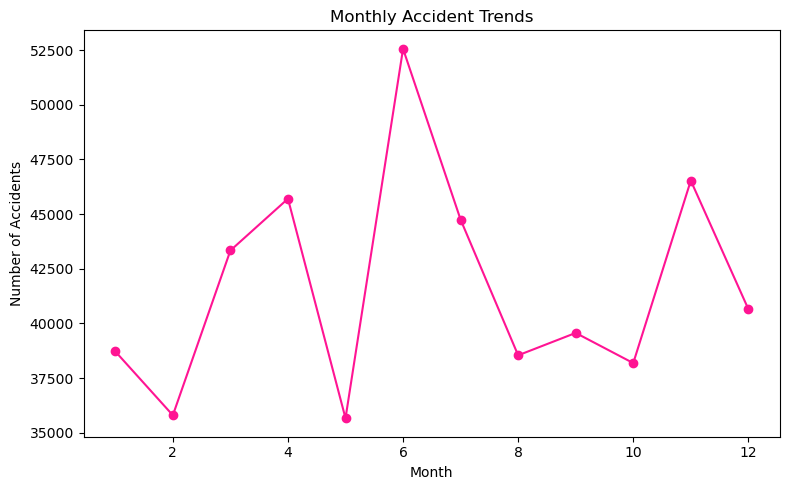

🗺️ Hotspot Map saved: accident_hotspot_map.html


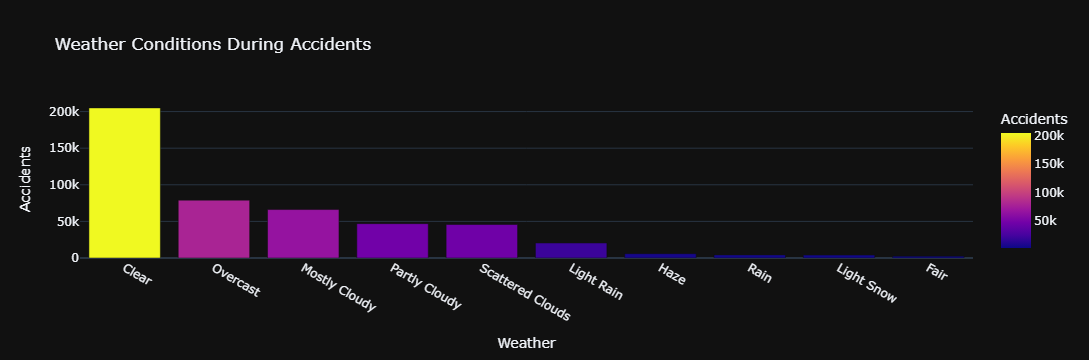

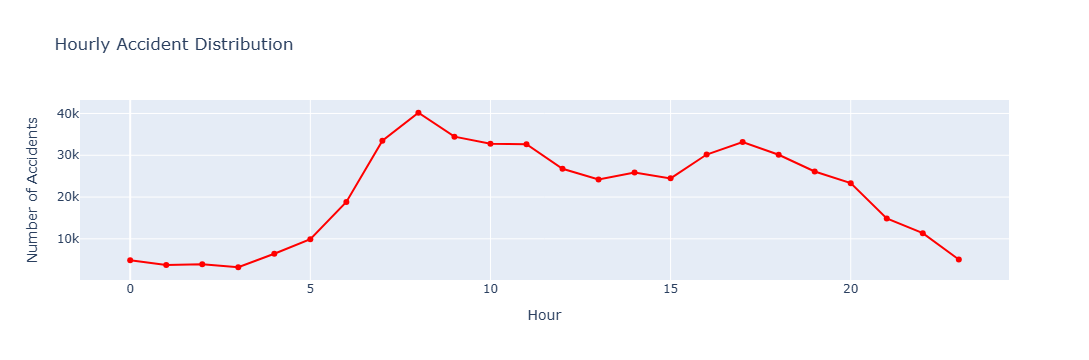

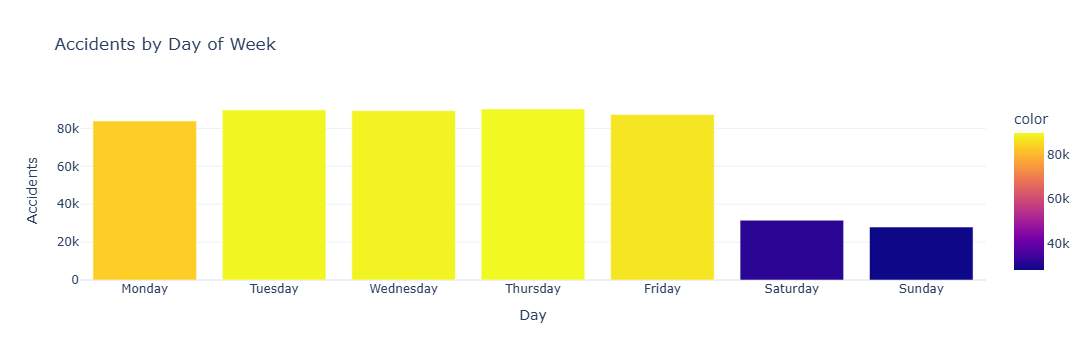

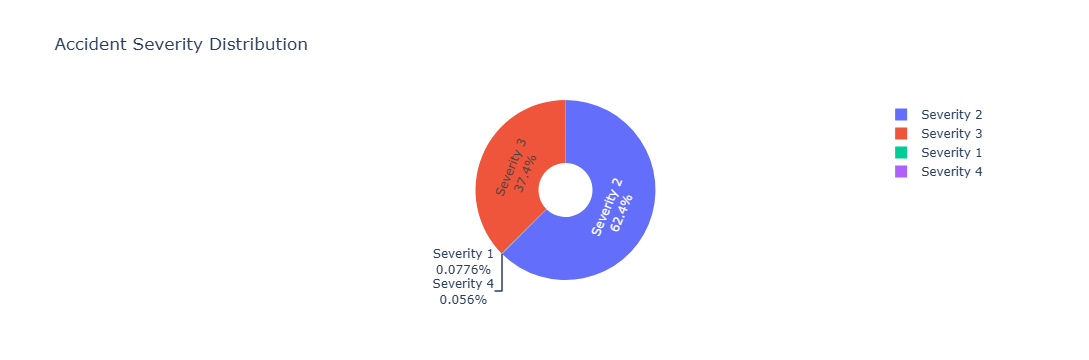

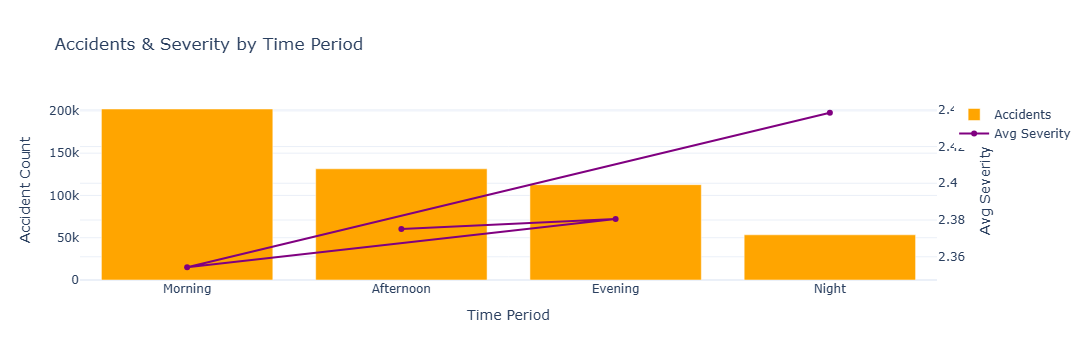


💡 KEY INSIGHTS
----------------------------------------
• Most common weather condition: Clear
• Peak accident hour: 8
• Most accident-prone day: Thursday
• Time of day with most accidents: Morning
• Highest severity average: Night (2.44)


In [5]:
# 🚦 TASK 4 – Traffic Accident Analysis (SkillCraft Internship)
# Analyze accident patterns by time, weather, severity, and location

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings("ignore")

# 📥 Load Dataset
df = pd.read_csv("US_Accidents_March23.csv", nrows=500000)  # Use chunk if needed
print(f"✅ Loaded: {df.shape[0]:,} rows | {df.shape[1]} columns")

# 📦 Filter relevant columns
df = df[['Start_Time', 'Severity', 'Weather_Condition', 'Visibility(mi)', 'City',
         'State', 'Start_Lat', 'Start_Lng', 'Sunrise_Sunset', 'Distance(mi)',
         'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)']]

# ⏱️ Time Features
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month

# ⌚ Time of Day buckets
def time_of_day(hour):
    if 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'

df['Time_of_Day'] = df['Hour'].apply(time_of_day)

# ===============================
# 📊 STATIC VISUALIZATIONS (MATPLOTLIB/SEABORN)
# ===============================

# Accidents by Time of Day
plt.figure(figsize=(8,5))
sns.countplot(x='Time_of_Day', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='pastel')
plt.title("Accidents by Time Period")
plt.tight_layout()
plt.show()

# Monthly Trend
plt.figure(figsize=(8,5))
df['Month'].value_counts().sort_index().plot(marker='o', color='deeppink')
plt.title("Monthly Accident Trends")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

# ===============================
# 🌍 HOTSPOT MAP (FOLIUM)
# ===============================
sample_map = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)
accident_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
HeatMap(sample_map.values, radius=8).add_to(accident_map)
accident_map.save("accident_hotspot_map.html")
print("🗺️ Hotspot Map saved: accident_hotspot_map.html")

# ===============================
# 📊 INTERACTIVE VISUALIZATIONS (PLOTLY)
# ===============================

# 1. Weather Conditions (Plotly)
weather_counts = df['Weather_Condition'].value_counts().nlargest(10).reset_index()
weather_counts.columns = ['Weather', 'Accidents']
fig = px.bar(weather_counts, x='Weather', y='Accidents', color='Accidents',
             title='Weather Conditions During Accidents', template='plotly_dark')
fig.show()

# 2. Hourly Distribution (Plotly Line)
hourly_counts = df['Hour'].value_counts().sort_index()
fig = px.line(x=hourly_counts.index, y=hourly_counts.values,
              labels={'x': 'Hour', 'y': 'Number of Accidents'},
              title='Hourly Accident Distribution')
fig.update_traces(mode='lines+markers', line_color='red')
fig.show()

# 3. Day of Week (Plotly)
dow_counts = df['Day'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig = px.bar(x=dow_counts.index, y=dow_counts.values,
             title='Accidents by Day of Week',
             labels={'x': 'Day', 'y': 'Accidents'},
             color=dow_counts.values, template='plotly_white')
fig.show()

# 4. Severity Pie (Plotly)
severity_counts = df['Severity'].value_counts().sort_index()
labels = [f"Severity {i}" for i in severity_counts.index]
fig = px.pie(values=severity_counts.values, names=labels, hole=0.3,
             title="Accident Severity Distribution")
fig.update_traces(textinfo='percent+label')
fig.show()

# 5. Bar + Line Combo: Accidents + Avg Severity by Time of Day
severity_avg = df.groupby('Time_of_Day')['Severity'].mean()
period_counts = df['Time_of_Day'].value_counts().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

fig = go.Figure()
fig.add_bar(x=period_counts.index, y=period_counts.values, name='Accidents', marker_color='orange')
fig.add_trace(go.Scatter(x=severity_avg.index, y=severity_avg.values, name='Avg Severity',
                         mode='lines+markers', yaxis='y2', line=dict(color='purple')))

fig.update_layout(
    title="Accidents & Severity by Time Period",
    xaxis_title="Time Period",
    yaxis=dict(title='Accident Count'),
    yaxis2=dict(title='Avg Severity', overlaying='y', side='right'),
    template='plotly_white'
)
fig.show()

# ===============================
# 🧠 INSIGHTS
# ===============================
print("\n💡 KEY INSIGHTS")
print("-" * 40)
print(f"• Most common weather condition: {df['Weather_Condition'].mode()[0]}")
print(f"• Peak accident hour: {df['Hour'].mode()[0]}")
print(f"• Most accident-prone day: {df['Day'].mode()[0]}")
print(f"• Time of day with most accidents: {df['Time_of_Day'].mode()[0]}")
print(f"• Highest severity average: {severity_avg.idxmax()} ({severity_avg.max():.2f})")


